#### Pythonの文法について不安がある人は第3回目の[Python Basic](https://colab.research.google.com/github/katsuya0719/design-engineering-class/blob/main/class3_python/Python_basics.ipynb)をもう一度復習してみてください

### pandas, matplotlibを読み込みます

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

### BAUES Analysisで計算したエネルギーシミュレーションの結果の時系列データを可視化してみます

BAUES Analysisを使って計算すると以下のような結果が出力されると思います

<img src="img/BAUES_Analysis_result.png">

解析結果でダウンロードを押すと、計算結果に紐づく生データをダウンロードすることができます。今回の演習ではそのデータを使います

#### 時系列データを読み込む

In [41]:
df=pd.read_csv('data/combined.csv')

In [42]:
df

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE2:Zone Air Temperature [C](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly)
0,01/01 01:00:00,11.650000,13.249770,13.071029,13.408566,0.000000,0.00,0.000000,0.00,0.000000,0.00
1,01/01 02:00:00,11.025000,12.297875,12.517918,12.781409,0.000000,0.00,0.000000,0.00,0.000000,0.00
2,01/01 03:00:00,9.991667,11.295539,11.784204,12.026128,0.000000,0.00,0.000000,0.00,0.000000,0.00
3,01/01 04:00:00,9.350000,10.374389,11.340089,11.520071,0.000000,0.00,0.000000,0.00,0.000000,0.00
4,01/01 05:00:00,8.808333,9.580303,11.044536,11.152258,0.000000,0.00,0.000000,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,11.266667,22.003337,22.001905,22.001555,2.346118,0.25,2.461026,0.25,2.460983,0.25
8756,12/31 21:00:00,10.808333,22.003326,22.001843,22.001517,2.372398,0.25,2.451033,0.25,2.456704,0.25
8757,12/31 22:00:00,10.308333,22.003064,22.001781,22.001466,2.382239,0.25,2.440372,0.25,2.449631,0.25
8758,12/31 23:00:00,9.750000,15.044506,16.523176,16.551646,0.000000,0.00,0.000000,0.00,0.000000,0.00


上のExcelのような二次元の表データをpandasで読み込むとdataframeという形式になります。pandasの基本はこのdataframeをいろいろなメソッドを使って操作することです

### 行列に関する操作

pandasに関する操作はよく[このサイト](https://note.nkmk.me/python-pandas-index-row-column/)を参照していました

#### READ(読み込み)操作について

#### ある列(Environment:Site Outdoor Air Drybulb Temperature [C](Hourly))を列名指定で抽出する

In [8]:
df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']

0      -3.808333
1      -6.508333
2      -6.916667
3      -6.941667
4      -6.608333
          ...   
8755   -3.558333
8756   -3.658333
8757   -3.816667
8758   -4.250000
8759   -4.966667
Name: Environment:Site Outdoor Air Drybulb Temperature [C](Hourly), Length: 8760, dtype: float64

#### ある複数の列(Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly))を列名指定で抽出する

In [10]:
df[['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)','1_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly)']]

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly)
0,-3.808333,1523.2
1,-6.508333,1523.2
2,-6.916667,1523.2
3,-6.941667,1523.2
4,-6.608333,1523.2
...,...,...
8755,-3.558333,1472.0
8756,-3.658333,1420.8
8757,-3.816667,1433.6
8758,-4.250000,1523.2


#### ある行(1-4行目）を抽出する

In [11]:
df[1:4]

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly),0_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Inside Face Temperature [C](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Outside Face Temperature [C](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Average Face Conduction Heat Gain Rate [W](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Average Face Conduction Heat Loss Rate [W](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0002:Surface Inside Face Temperature [C](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0002:Surface Outside Face Temperature [C](Hourly),...,BLOCK 0_ZONE1 STOREY 0 WALL 0001 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0001 WINDOW:Surface Outside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0002 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0002 WINDOW:Surface Outside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0003 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0003 WINDOW:Surface Outside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0004 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0004 WINDOW:Surface Outside Face Temperature [C](Hourly),1_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE1:Zone Air Temperature [C](Hourly)
1,01/01 02:00:00,-6.508333,1523.2,1510.72,16.503110,-2.427061,0.0,1009.221050,16.527065,-2.242789,...,7.067011,-0.625860,7.066463,-0.626518,7.067357,-0.626074,6.996724,-0.764228,18.570521,16.388755
2,01/01 03:00:00,-6.916667,1523.2,1510.72,16.439567,-3.058380,0.0,979.386312,16.463310,-2.896046,...,6.810301,-0.962800,6.809471,-0.963210,6.744654,-1.087672,6.746331,-1.088606,18.500842,16.216911
3,01/01 04:00:00,-6.941667,1523.2,1510.72,16.374045,-3.507840,0.0,924.751604,16.397482,-3.362915,...,6.691763,-1.069146,6.690939,-1.069548,6.641696,-1.169413,6.641906,-1.169312,18.428907,16.089807


[このページ](https://note.nkmk.me/python-pandas-at-iat-loc-iloc/)を参照

#### あるセル（2列目の2行目）を指定 (配列などのidは0始まり)

In [16]:
df.iloc[1, 1]

-6.508333333333333

#### 複数のセル(2-3列目の1-100行目)を抽出

In [22]:
df.iloc[0:100, 1: 4]

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly),0_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly)
0,-3.808333,1523.2,1510.72
1,-6.508333,1523.2,1510.72
2,-6.916667,1523.2,1510.72
3,-6.941667,1523.2,1510.72
4,-6.608333,1523.2,1510.72
...,...,...,...
95,-5.033333,1190.4,1177.92
96,-5.491667,1190.4,1177.92
97,-5.933333,1190.4,1177.92
98,-6.391667,1190.4,1177.92


#### フィルター機能について

[このページ](https://note.nkmk.me/python-pandas-multiple-conditions/)を参照

#### 外気温(Environment:Site Outdoor Air Drybulb Temperature [C](Hourly))が10℃以上のデータセットを抽出する

In [50]:
df[df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']>10]

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE2:Zone Air Temperature [C](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly)
0,01/01 01:00:00,11.650000,13.249770,13.071029,13.408566,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,01/01 02:00:00,11.025000,12.297875,12.517918,12.781409,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
10,01/01 11:00:00,10.650000,24.555009,25.236425,23.277726,0.000000,0.000000,0.000000,0.000,0.349924,0.041667
11,01/01 12:00:00,12.508333,25.993411,25.911645,25.915191,2.114336,0.236111,0.542612,0.125,1.891778,0.201389
12,01/01 13:00:00,14.291667,25.997534,25.671466,25.998603,2.351760,0.250000,0.000000,0.000,2.752385,0.250000
...,...,...,...,...,...,...,...,...,...,...,...
8753,12/31 18:00:00,11.983333,22.181218,22.001152,22.002105,1.484331,0.166667,2.418522,0.250,2.290863,0.243056
8754,12/31 19:00:00,11.666667,22.002798,22.001896,22.001480,2.293598,0.250000,2.461964,0.250,2.445626,0.250000
8755,12/31 20:00:00,11.266667,22.003337,22.001905,22.001555,2.346118,0.250000,2.461026,0.250,2.460983,0.250000
8756,12/31 21:00:00,10.808333,22.003326,22.001843,22.001517,2.372398,0.250000,2.451033,0.250,2.456704,0.250000


#### zone1とzone2の温度が20℃以下のときのデータセットを抽出（複数条件）

In [35]:
df[(df['1_ZONE1:Zone Air Temperature [C](Hourly)']<=20)&(df['0_ZONE1:Zone Air Temperature [C](Hourly) ']<=20)]

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly),0_ZONE1:Zone Total Internal Total Heating Rate [W](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Inside Face Temperature [C](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Outside Face Temperature [C](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Average Face Conduction Heat Gain Rate [W](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0001:Surface Average Face Conduction Heat Loss Rate [W](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0002:Surface Inside Face Temperature [C](Hourly),BLOCK 1_ZONE1 STOREY 0 WALL 0002:Surface Outside Face Temperature [C](Hourly),...,BLOCK 0_ZONE1 STOREY 0 WALL 0001 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0001 WINDOW:Surface Outside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0002 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0002 WINDOW:Surface Outside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0003 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0003 WINDOW:Surface Outside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0004 WINDOW:Surface Inside Face Temperature [C](Hourly),BLOCK 0_ZONE1 STOREY 0 WALL 0004 WINDOW:Surface Outside Face Temperature [C](Hourly),1_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE1:Zone Air Temperature [C](Hourly)
0,01/01 01:00:00,-3.808333,1523.2,1510.72,16.567073,-1.236706,0.0,716.905595,16.591132,-1.012424,...,8.389869,1.598103,8.458099,1.728962,8.458998,1.729418,8.378594,1.572882,18.640739,16.849148
1,01/01 02:00:00,10.000000,1523.2,1510.72,16.503110,-2.427061,0.0,1009.221050,16.527065,-2.242789,...,7.067011,-0.625860,7.066463,-0.626518,7.067357,-0.626074,6.996724,-0.764228,18.570521,16.388755
2,01/01 03:00:00,-6.916667,1523.2,1510.72,16.439567,-3.058380,0.0,979.386312,16.463310,-2.896046,...,6.810301,-0.962800,6.809471,-0.963210,6.744654,-1.087672,6.746331,-1.088606,18.500842,16.216911
3,01/01 04:00:00,-6.941667,1523.2,1510.72,16.374045,-3.507840,0.0,924.751604,16.397482,-3.362915,...,6.691763,-1.069146,6.690939,-1.069548,6.641696,-1.169413,6.641906,-1.169312,18.428907,16.089807
4,01/01 05:00:00,-6.608333,1523.2,1510.72,16.305044,-3.788322,0.0,822.631871,16.328079,-3.659381,...,6.731896,-0.880028,6.731083,-0.880418,6.702970,-0.938020,6.703182,-0.937919,18.353626,15.997361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,12/31 05:00:00,-7.416667,1523.2,1510.72,16.728900,-3.510693,0.0,817.332841,16.981741,-2.376875,...,7.254930,-0.561193,7.161595,-0.729270,7.172656,-0.723561,7.258540,-0.559309,18.679042,16.715857
8741,12/31 06:00:00,-7.558333,1523.2,1510.72,16.646231,-3.876782,0.0,802.454964,16.890334,-2.805745,...,7.082596,-0.750455,7.060951,-0.783879,7.009689,-0.898746,7.005730,-0.900353,18.592625,16.572346
8757,12/31 22:00:00,-3.816667,1433.6,1383.68,17.183147,-0.182050,0.0,733.614483,17.522917,3.507689,...,9.847044,2.767770,9.909663,2.906247,9.925855,2.914684,9.853928,2.771375,19.482606,18.734771
8758,12/31 23:00:00,-4.250000,1523.2,1510.72,17.036631,-0.677457,0.0,781.173661,17.385881,2.734491,...,9.006894,1.851507,9.085148,2.021083,9.101940,2.029784,9.014018,1.855146,18.926834,17.721505


#### EDIT(編集)操作について

#### あるセル（2列目の2行目）の値を変更 (配列などのidは0始まり)

In [23]:
df.iloc[1, 1]=10

In [48]:
df

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE2:Zone Air Temperature [C](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly)
0,01/01 01:00:00,11.650000,13.249770,13.071029,13.408566,0.000000,0.00,0.000000,0.00,0.000000,0.00
1,01/01 02:00:00,11.025000,12.297875,12.517918,12.781409,0.000000,0.00,0.000000,0.00,0.000000,0.00
2,01/01 03:00:00,9.991667,11.295539,11.784204,12.026128,0.000000,0.00,0.000000,0.00,0.000000,0.00
3,01/01 04:00:00,9.350000,10.374389,11.340089,11.520071,0.000000,0.00,0.000000,0.00,0.000000,0.00
4,01/01 05:00:00,8.808333,9.580303,11.044536,11.152258,0.000000,0.00,0.000000,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,11.266667,22.003337,22.001905,22.001555,2.346118,0.25,2.461026,0.25,2.460983,0.25
8756,12/31 21:00:00,10.808333,22.003326,22.001843,22.001517,2.372398,0.25,2.451033,0.25,2.456704,0.25
8757,12/31 22:00:00,10.308333,22.003064,22.001781,22.001466,2.382239,0.25,2.440372,0.25,2.449631,0.25
8758,12/31 23:00:00,9.750000,15.044506,16.523176,16.551646,0.000000,0.00,0.000000,0.00,0.000000,0.00


#### 可視化機能について

#### zone0,zone1の室温情報を折れ線グラフで表示してみる

[このページ](https://note.nkmk.me/python-pandas-plot/)を参照

<AxesSubplot:>

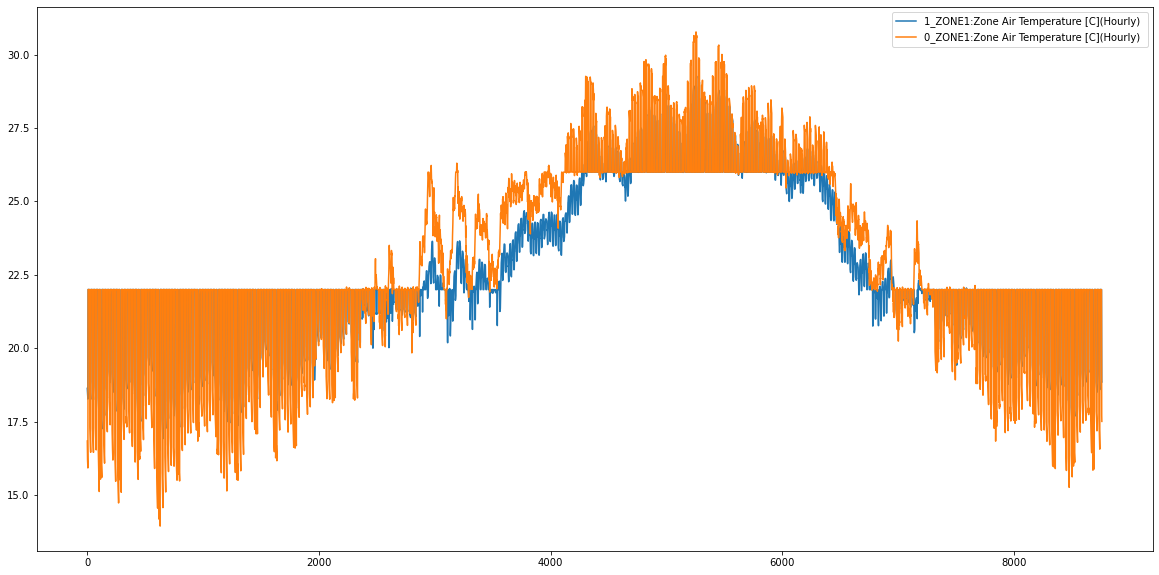

In [36]:
df[['1_ZONE1:Zone Air Temperature [C](Hourly)','0_ZONE1:Zone Air Temperature [C](Hourly) ']].plot(figsize=(20,10))

#### zone0,zone1の室温の頻度分布を表示してみる

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

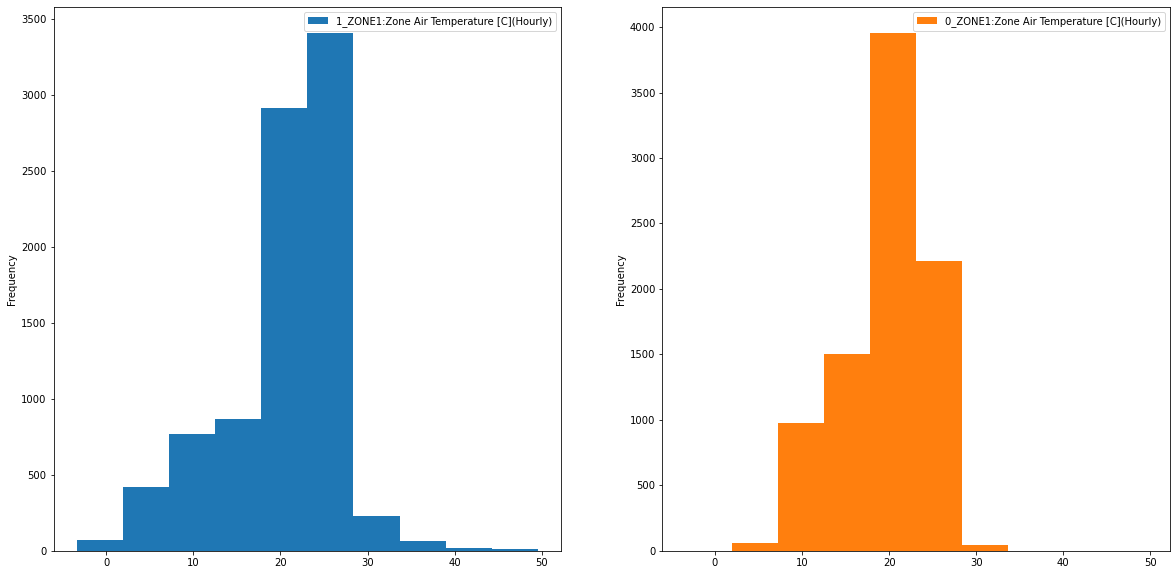

In [49]:
df[['1_ZONE1:Zone Air Temperature [C](Hourly)','0_ZONE1:Zone Air Temperature [C](Hourly)']].plot.hist(subplots=True, layout=(1, 2),figsize=(20,10))

### Matplotlibについて

Data Visualization用のライブラリ. Excelでできるような可視化はもちろん、Excelではなかなか難しいような可視化も可能

例えば、こんなの  
[参照ページ](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

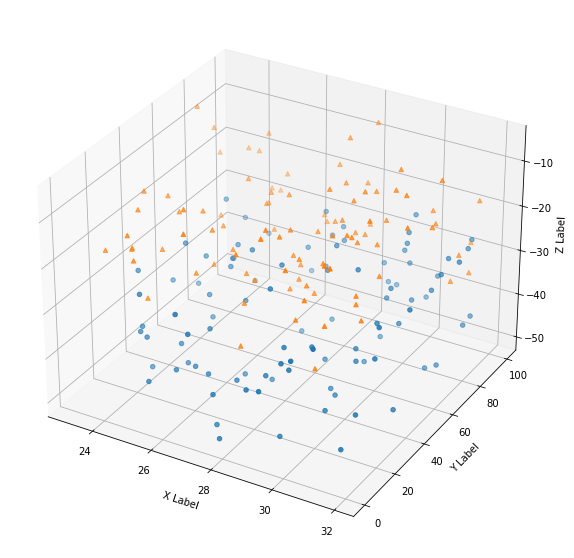

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

アニメーションもできたり  
[参照ページ](https://matplotlib.org/stable/gallery/animation/random_walk.html#sphx-glr-gallery-animation-random-walk-py)

<IPython.core.display.Javascript object>


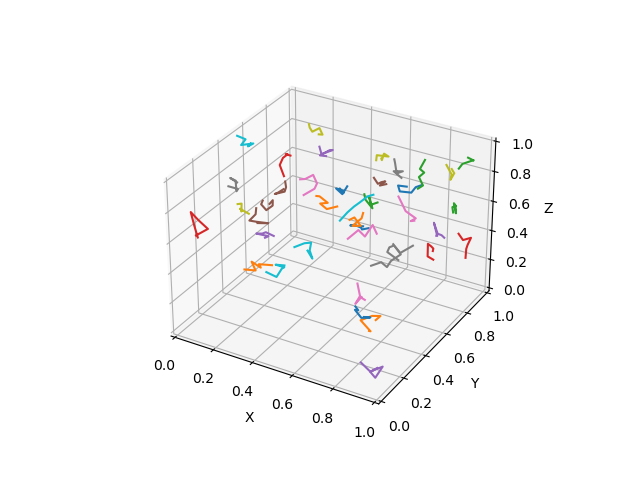

C:\Users\katsu\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

### 操作可能な3dプロットも作れる

[参照ページ](https://resanaplaza.com/2021/08/14/%E3%80%90%E8%B6%85%E7%B0%A1%E5%8D%98%E3%80%91matplotlib%E3%81%A73d-plot-%E3%82%92%E3%83%9E%E3%82%A6%E3%82%B9%E3%81%A7%E3%82%B0%E3%83%AA%E3%82%B0%E3%83%AA%E5%9B%9E%E3%81%9D%E3%81%86%EF%BC%81%EF%BC%88by/)

<IPython.core.display.Javascript object>


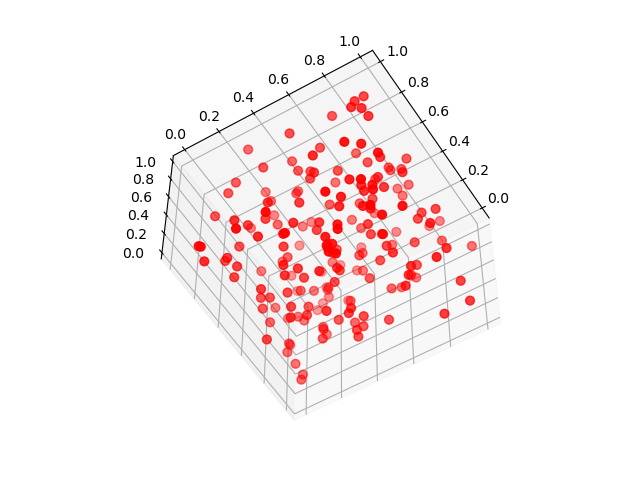

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 
#描画エリアの作成
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
 
#numpyを使ってXYZの値を設定
x = np.random.rand(200,1) 
y = np.random.rand(200,1)
z = np.random.rand(200,1)
 
#散布図の作成
ax.scatter(x,y,z,s=40,c="red")
 
#描画
plt.show()

#### 0_zone1のエアコンの運転COPをチェックしてみる

In [43]:
df=pd.read_csv('data/combined.csv')

In [45]:
df

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),1_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE1:Zone Air Temperature [C](Hourly),0_ZONE2:Zone Air Temperature [C](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_1_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly),VRF_0_ZONE2 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly)
0,01/01 01:00:00,11.650000,13.249770,13.071029,13.408566,0.000000,0.00,0.000000,0.00,0.000000,0.00
1,01/01 02:00:00,11.025000,12.297875,12.517918,12.781409,0.000000,0.00,0.000000,0.00,0.000000,0.00
2,01/01 03:00:00,9.991667,11.295539,11.784204,12.026128,0.000000,0.00,0.000000,0.00,0.000000,0.00
3,01/01 04:00:00,9.350000,10.374389,11.340089,11.520071,0.000000,0.00,0.000000,0.00,0.000000,0.00
4,01/01 05:00:00,8.808333,9.580303,11.044536,11.152258,0.000000,0.00,0.000000,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,11.266667,22.003337,22.001905,22.001555,2.346118,0.25,2.461026,0.25,2.460983,0.25
8756,12/31 21:00:00,10.808333,22.003326,22.001843,22.001517,2.372398,0.25,2.451033,0.25,2.456704,0.25
8757,12/31 22:00:00,10.308333,22.003064,22.001781,22.001466,2.382239,0.25,2.440372,0.25,2.449631,0.25
8758,12/31 23:00:00,9.750000,15.044506,16.523176,16.551646,0.000000,0.00,0.000000,0.00,0.000000,0.00


In [44]:
import matplotlib.pyplot as plt

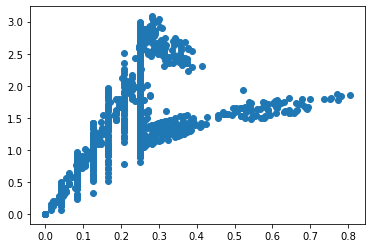

In [46]:
plt.scatter(df['VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump Part Load Ratio [](Hourly)'], df['VRF_0_ZONE1 VRF HEAT PUMP:VRF Heat Pump COP [](Hourly)'])